## BIC30007
# Sequence Alignment Fundamentals

## Sub-Capaian Pembelajaran
* Mahasiswa mampu menjelaskan bagaimana sekuen nukleotida dan protein ditampilkan dalam bentuk data terstruktur (FASTA, FASTQ, GenBank, PDB)
* Mampu menjelaskan bagaiman algoritma dynamic programming bekerja untuk pairwise sequence alignment
* Mampu menjelaskan perbedaan global dan local alignment serta aplikasinya
* Mampu melakukan pensejajaran sekuen baru terhadap database untuk mendapatkan informasi dasar dan asal usul evolusinya
* Mampu menggunakan ketrampilan dan literasi komputasi untuk melakukan pensejajaran sekuen

## Pengantar
Aligning novel sequences with previously characterized genes or proteins provides important insights into their common attributes and evolutionary origins. In this hands-on session we will explore the principles underlying the computational tools that can be used to compute and evaluate sequence alignments.

## Dot Plot
Dot Plot digunakan untuk melakukan perbandingan visual dari dua sekuen secara sederhana. Pada dot plot yang paling sederhana, sebuah titik dibuat ketika sekuen horizontal dan vertikal match.

Dot plots are a simple graphical approach for the visual comparison of two sequences. They have a long history (see Maizel and Lenk 1981 and references therein) and entail placing one sequence on the vertical axis of a 2D grid (or matrix) and the other on the horizontal. In its simplest form, a dot is placed where the horizontal and vertical sequence values match.
More elaborate forms use 'sliding windows' composed of multiple characters and a threshold value, or 'match stringency' for two windows to be considered as matched.

Dotplots are used to determine the percent similarity between two sequences, usually DNA or protein, but are also used for whole genome alignments to detect syntenic regions. Each axis of a dotplot represents the linear arrangement of one sequence being compared. A short segment of one sequence (also called window size) is compared with all possible segments of the same length in the second sequence. This generates a matrix of several alignments between the two sequences. For each pair of alignments, the similarity between the sequences' residues is scored based on the probability with which the various pairs of aligned residues replace one another. If the similarity between any two segments exceeds a threshold value, then a positive score is registered, and a dot is displayed in the dotplot. Weak signals of homology could also be detected by manipulating this threshold value.

* Q1. Why does the DNA sequence have more dots than the protein sequence plot?
* Q2. How can we increase the signal to noise ratio?
* Q3. What does a 'Match stringency' larger than 'Window size' yield and why?
* Q4. What would off-diagonal runs of dots represent?
* Q5. What are the major weaknesses of this approach?

In [2]:
# load Library
from IPython.display import Image

### Analyzing Gene Structure
We can study the exon and intron gene structure graphically by using the graphical alignment program dotmatcher. dotmatcher can create dotplots in EMBOSS.

Let’s compare the Arabidopsis genomic region AT3G52905.1 with one cDNA.

Draw a threshold dotplot of two sequences
Created dotmatcher.1.png


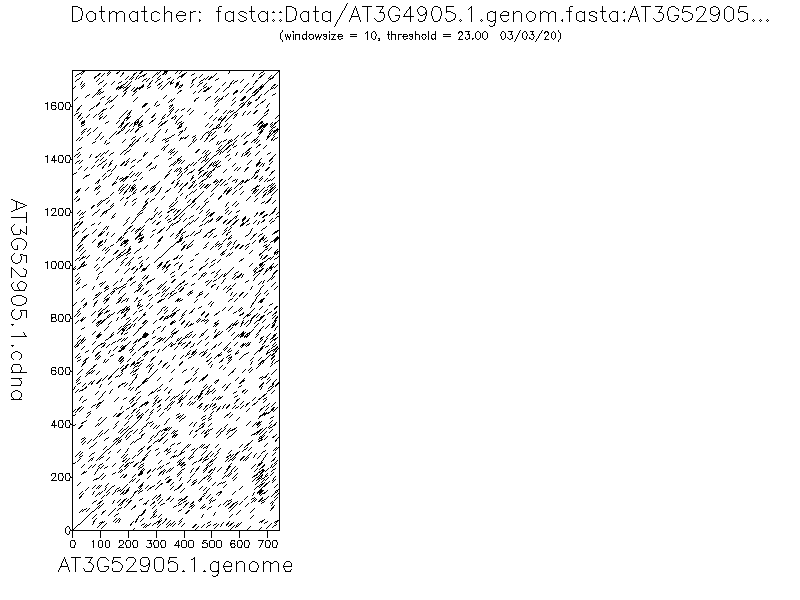

In [3]:
! dotmatcher Data/AT3G4905.1.genom.fasta Data/AT3G4905.1.cdna.fasta -graph png 
Image(filename='dotmatcher.1.png')

* Why is there so much noise in the result?
* Is there any parameter that we can use to improve the result?

Draw a threshold dotplot of two sequences
Created dotmatcher.1.png


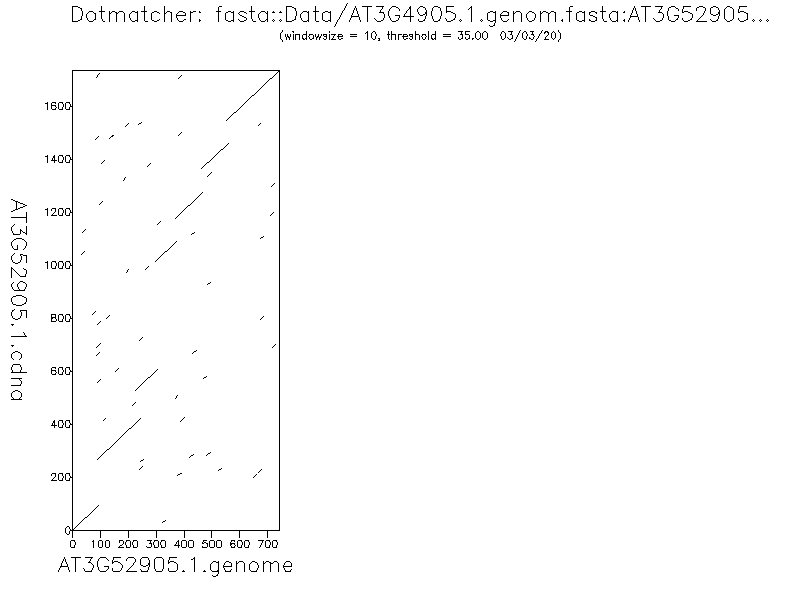

In [6]:
! dotmatcher -windowsize 10 -threshold 35 Data/AT3G4905.1.genom.fasta Data/AT3G4905.1.cdna.fasta -graph png 
Image(filename='dotmatcher.1.png')

* Why is the main diagonal split in several segments?

### Comparing Genes in close Species
We can study homologous regions between two proteins, one from human and another from dog. Using dotmatcher we will compare the CDS the human and dog genes.
* Are the genes similar along all the CDS?
* Why some regions could be more similar than others?

Draw a threshold dotplot of two sequences
Created dotmatcher.1.png


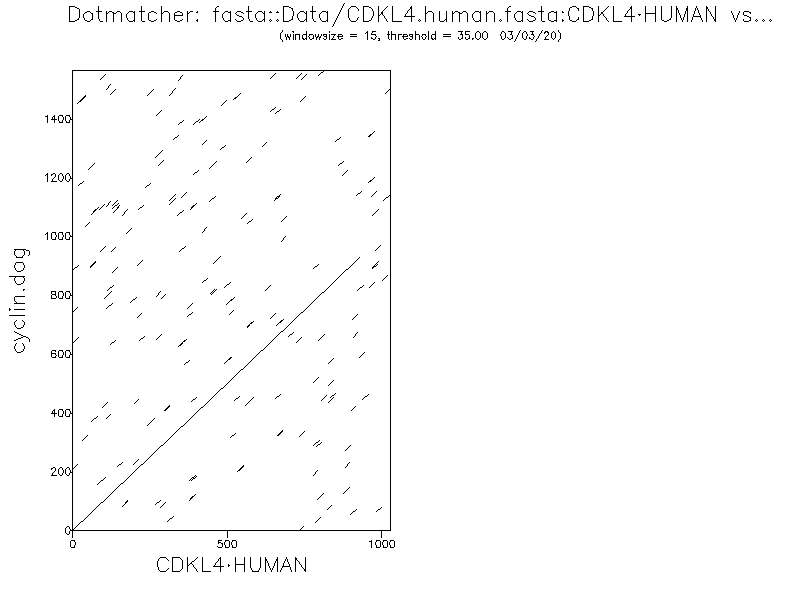

In [5]:
! dotmatcher -windowsize 15 -threshold 35 Data/CDKL4.human.fasta Data/cyclin.dog.fasta -graph png 
Image(filename='dotmatcher.1.png')

### Tandem Repeats
Graphical alignments are particularly well suited to study repeated or inverted regions. As an example we will study the repeats found in the human zinc finger Q9P255
* Align the protein against itself using dotmatcher.
* How do you interpret the resulting pattern?
* How are the repeats distributed? How many repeats are there?
* Change the threshold value and study how it affects the graphical alignment.
* Look for the domain structure of the Q9P255 in Uniprot.

In [ ]:
! dotmatcher Data/Q9P255.fasta Data/Q9P255.fasta -graph png 
Image(filename='dotmatcher.1.png')

Below are the mRNA sequences for α and β globin

In [ ]:
! dotmatcher -windowsize 25 -threshold 45 Data/HBA1.fasta Data/HBB.fasta -graph png 
Image(filename='dotmatcher.1.png')

## DNA sequence alignment
### local Alignment
We are going to do a local alignment between two DNA sequences: sequence1 and sequence2.
In the command line we would write:

In [7]:
! matcher Data/sequence1.fasta Data/sequence2.fasta stdout

Waterman-Eggert local alignment of two sequences
########################################
# Program: matcher
# Rundate: Tue  3 Mar 2020 17:00:37
# Commandline: matcher
#    [-asequence] Data/sequence1.fasta
#    [-bsequence] Data/sequence2.fasta
#    [-outfile] stdout
# Align_format: markx0
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: AJ002520.1
# 2: AJ002520.1
# Matrix: EDNAFULL
# Gap_penalty: 16
# Extend_penalty: 4
#
# Length: 191
# Identity:     106/191 (55.5%)
# Similarity:   106/191 (55.5%)
# Gaps:           4/191 ( 2.1%)
# Score: 142
# 
#
#=======================================

           2080       2090      2100      2110      2120 
AJ0025 CGCCACCAGG-ACACCTGCACGAGCCGAGCGGTGGAGGACCCGGGGCCCC
       : :: ::::  ::  : :: :  ::: :::::::     :: :  :  ::
AJ0025 CTCCCCCAGCTACTGCGGC-CTCGCCCAGCGGTGCTCCTCCAGCTGGTCC
     390       400        410       420       430        

            2130      2140

* How similar are the sequences?
* Are they similar in all its length?

Let’s align the reverse and complementary sequence:

In [8]:
! matcher -sreverse1 Data/sequence1.fasta Data/sequence2.fasta stdout

Waterman-Eggert local alignment of two sequences
########################################
# Program: matcher
# Rundate: Tue  3 Mar 2020 17:00:41
# Commandline: matcher
#    -sreverse1
#    [-asequence] Data/sequence1.fasta
#    [-bsequence] Data/sequence2.fasta
#    [-outfile] stdout
# Align_format: markx0
# Report_file: stdout
########################################

#=======================================
#
# Aligned_sequences: 2
# 1: AJ002520.1
# 2: AJ002520.1
# Matrix: EDNAFULL
# Gap_penalty: 16
# Extend_penalty: 4
#
# Length: 2650
# Identity:    2650/2650 (100.0%)
# Similarity:  2650/2650 (100.0%)
# Gaps:           0/2650 ( 0.0%)
# Score: 13250
# 
#
#=======================================

    2650      2640      2630      2620      2610         
AJ0025 TTTTTTTTTTTTTTTTTTTACATATAATCGTACATTTAATTTATTTGCAT
       ::::::::::::::::::::::::::::::::::::::::::::::::::
AJ0025 TTTTTTTTTTTTTTTTTTTACATATAATCGTACATTTAATTTATTTGCAT
               10        20        30        40        50

  

* How similar are the sequences? Why is different from the previous attempt?
* What would happen if we were to run the following command (Try to answer it before executing the command)?

In [ ]:
! matcher -sreverse1 -sreverse2 Data/sequence1.fasta Data/sequence2.fasta stdout

In [ ]:
from Bio.Emboss.Applications import NeedleCommandline
from Bio import AlignIO

In [ ]:
needle_cline = NeedleCommandline(asequence="Data/alpha.faa", 
                                 bsequence="Data/beta.faa", 
                                 gapopen=10, 
                                 gapextend=0.5, 
                                 outfile="needle.txt")
print(needle_cline)
stdout, stderr = needle_cline()
print(stdout + stderr)
align = AlignIO.read("needle.txt", "emboss")
print(align)

In [ ]:
# !conda install -c biobuilds clustalw
from Bio.Align.Applications import ClustalwCommandline

In [ ]:
clustalw_cline = ClustalwCommandline("clustalw2", infile="Data/opuntia.fasta")
print(clustalw_cline)
stdout, stderr = clustalw_cline()
align = AlignIO.read("Data/opuntia.aln", "clustal")
print(align)

In [ ]:
from Bio import Phylo
tree = Phylo.read("Data/opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

In [ ]:
from Bio import pairwise2
from Bio import SeqIO
seq1 = SeqIO.read("Data/alpha.faa", "fasta")
seq2 = SeqIO.read("Data/beta.faa", "fasta")
alignments = pairwise2.align.globalxx(seq1.seq, seq2.seq)